In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv("hf://datasets/TrainingDataPro/email-spam-classification/email_spam.csv")

In [3]:
df.head(5)

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [4]:
df.shape

(84, 3)

In [5]:
df.info

<bound method DataFrame.info of                                                 title  \
0                           ?? the secrets to SUCCESS   
1                     ?? You Earned 500 GCLoot Points   
2                          ?? Your GitHub launch code   
3   [The Virtual Reward Center] Re: ** Clarifications   
4   10-1 MLB Expert Inside, Plus Everything You Ne...   
..                                                ...   
79  Your application for the position of  Child Pr...   
80     Your Kilimall Account is Ready - Shopping Now!   
81  Your Steam account: Access from new web or mob...   
82                 Your uploaded document is rejected   
83   You've Earned a Reward from Bard Explorers India   

                                                 text      type  
0   Hi James,\n\nHave you claim your complimentary...      spam  
1   \nalt_text\nCongratulations, you just earned\n...  not spam  
2   Here's your GitHub launch code, @Mortyj420!\n ...  not spam  
3   Hello,\n \nThan

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['type']=encoder.fit_transform(df['type'])

In [7]:
df.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",1
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",0
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",0
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",0
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",1


In [8]:
df.isnull().sum()

title    0
text     0
type     0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(keep='first')

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",1
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",0
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",0
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",0
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",1
...,...,...,...
79,Your application for the position of Child Pr...,"Dear Maryam, \n\n \n\nI would like to thank yo...",0
80,Your Kilimall Account is Ready - Shopping Now!,"Dear Customer,\n\nWelcome to Kilimall, Thanks ...",0
81,Your Steam account: Access from new web or mob...,"Dear vladis163rus,\nHere is the Steam Guard co...",0
82,Your uploaded document is rejected,View In Browser | Log in\n \n \n\nSkrill logo\...,0


In [11]:
df.duplicated().sum()

1

In [12]:
df['type'].value_counts()

type
0    58
1    26
Name: count, dtype: int64

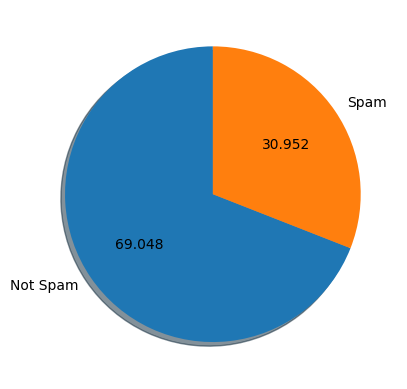

In [13]:
plt.pie(df['type'].value_counts() , labels=['Not Spam' , 'Spam'] , autopct="%0.3f", shadow = True, startangle = 90)
plt.show()

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Mr.
[nltk_data]     X\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df['num_characters']=df['text'].apply(len)

In [16]:
df.head(6)

,title,text,type,num_characters
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",1,302
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",0,350
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",0,166
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",0,399
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",1,6079
5,AFE Model Casting Call,Model Casting Call\nThank you for taking the t...,0,1057


In [17]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [18]:
df.head(6)

,title,text,type,num_characters,num_words
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",1,302,63
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",0,350,64
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",0,166,31
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",0,399,71
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",1,6079,1276
5,AFE Model Casting Call,Model Casting Call\nThank you for taking the t...,0,1057,183


In [19]:
df['num_senteces']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,title,text,type,num_characters,num_words,num_senteces
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",1,302,63,5
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",0,350,64,2
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",0,166,31,2
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",0,399,71,5
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",1,6079,1276,67


In [21]:
df[['num_characters', 'num_words' , 'num_senteces']].describe()

,num_characters,num_words,num_senteces
count,84.000000,84.00000,84.000000
mean,845.690476,161.50000,8.666667
std,989.806151,198.73549,10.201976
min,19.000000,3.00000,1.000000
25%,312.750000,62.50000,4.000000
50%,568.000000,110.50000,6.000000
75%,941.000000,181.50000,10.000000
max,6079.000000,1276.00000,67.000000


In [22]:
df[df['type'] == 0][['num_characters', 'num_words' , 'num_senteces']].describe()

,num_characters,num_words,num_senteces
count,58.000000,58.000000,58.000000
mean,890.172414,165.241379,8.517241
std,912.381406,178.124470,9.063599
min,68.000000,14.000000,1.000000
25%,366.750000,67.750000,4.000000
50%,628.500000,108.500000,6.000000
75%,976.250000,182.500000,9.750000
max,4745.000000,994.000000,54.000000


In [23]:
df[df['type'] == 1][['num_characters', 'num_words' , 'num_senteces']].describe()

,num_characters,num_words,num_senteces
count,26.000000,26.000000,26.000000
mean,746.461538,153.153846,9.000000
std,1157.525092,242.240656,12.572987
min,19.000000,3.000000,1.000000
25%,184.250000,40.750000,4.000000
50%,530.500000,110.500000,6.500000
75%,799.250000,153.750000,9.750000
max,6079.000000,1276.000000,67.000000


E:\anacoda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anacoda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

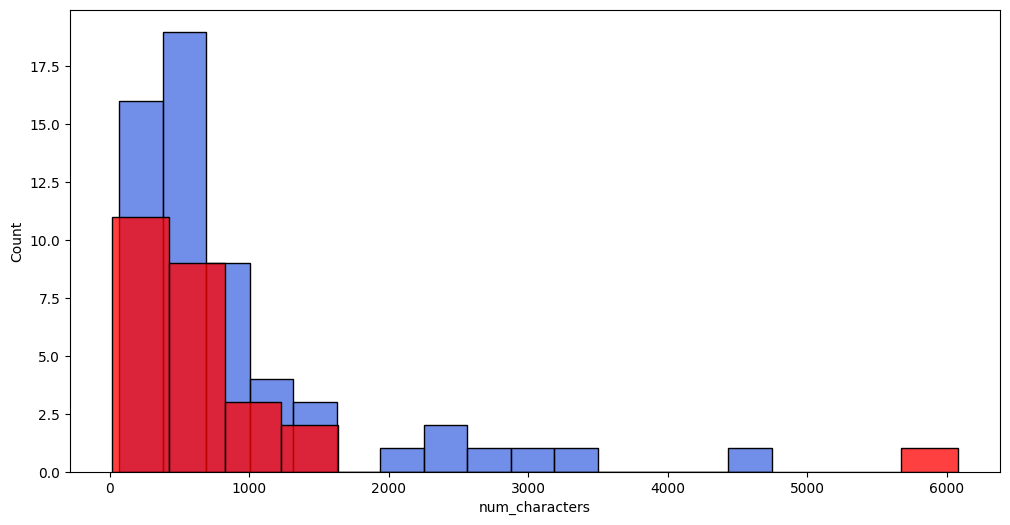

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['type'] == 0]['num_characters'] , color='royalblue')
sns.histplot(df[df['type'] == 1]['num_characters'],color='red')

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df.title)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df.title)

In [27]:
df['text'] = df['text'].apply(lambda x: ''.join(char for char in x if char.isalnum() or char.isspace()))
print(df)

                                                title  \
0                           ?? the secrets to SUCCESS   
1                     ?? You Earned 500 GCLoot Points   
2                          ?? Your GitHub launch code   
3   [The Virtual Reward Center] Re: ** Clarifications   
4   10-1 MLB Expert Inside, Plus Everything You Ne...   
..                                                ...   
79  Your application for the position of  Child Pr...   
80     Your Kilimall Account is Ready - Shopping Now!   
81  Your Steam account: Access from new web or mob...   
82                 Your uploaded document is rejected   
83   You've Earned a Reward from Bard Explorers India   

                                                 text  type  num_characters  \
0   Hi James\n\nHave you claim your complimentary ...     1             302   
1   \nalttext\nCongratulations you just earned\n50...     0             350   
2   Heres your GitHub launch code Mortyj420\n \nan...     0             166   

In [28]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
            
    return " ".join(y)

In [29]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('carrying')

'carri'

In [30]:
df['transformed_text'] = df['text'].apply(transform_text)

In [31]:
df.head()

,title,text,type,num_characters,num_words,num_senteces,transformed_text
0,?? the secrets to SUCCESS,Hi James\n\nHave you claim your complimentary ...,1,302,63,5,hi jame claim complimentari gift yet ive compi...
1,?? You Earned 500 GCLoot Points,\nalttext\nCongratulations you just earned\n50...,0,350,64,2,alttext congratul earn 500 complet follow offe...
2,?? Your GitHub launch code,Heres your GitHub launch code Mortyj420\n \nan...,0,166,31,2,here github launch code mortyj420 octocat stan...
3,[The Virtual Reward Center] Re: ** Clarifications,Hello\n \nThank you for contacting the Virtual...,0,399,71,5,hello thank contact virtual reward center virt...
4,"10-1 MLB Expert Inside, Plus Everything You Ne...",Hey Prachanda Rawal\n\nTodays newsletter is Ja...,1,6079,1276,67,hey prachanda rawal today newslett jampack eve...


In [32]:
import sys
print(sys.executable)

E:\anacoda\python.exe


In [33]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

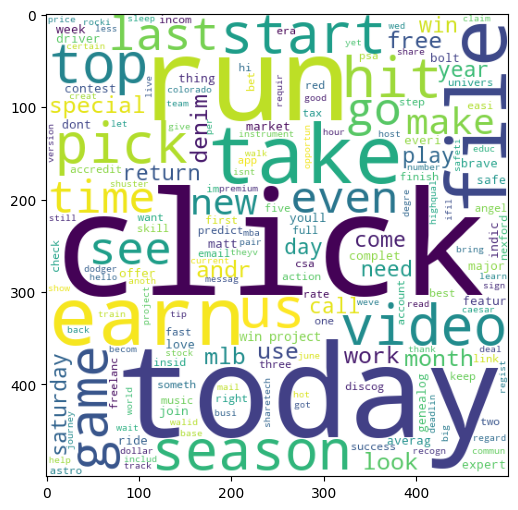

In [34]:
spam_wc = wc.generate(df[df['type'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

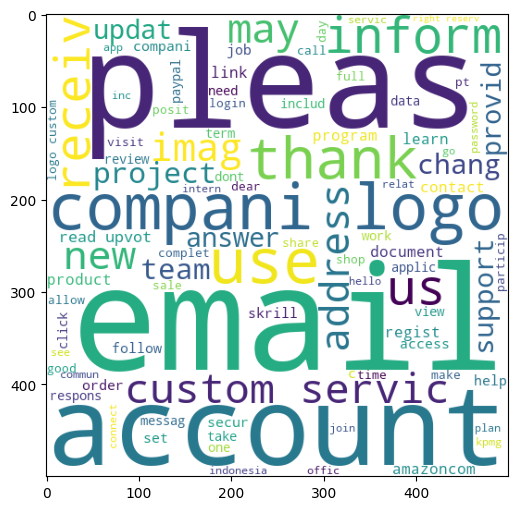

In [35]:
no_spam_wc = wc.generate(df[df['type'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(no_spam_wc)

In [36]:
df.head()

,title,text,type,num_characters,num_words,num_senteces,transformed_text
0,?? the secrets to SUCCESS,Hi James\n\nHave you claim your complimentary ...,1,302,63,5,hi jame claim complimentari gift yet ive compi...
1,?? You Earned 500 GCLoot Points,\nalttext\nCongratulations you just earned\n50...,0,350,64,2,alttext congratul earn 500 complet follow offe...
2,?? Your GitHub launch code,Heres your GitHub launch code Mortyj420\n \nan...,0,166,31,2,here github launch code mortyj420 octocat stan...
3,[The Virtual Reward Center] Re: ** Clarifications,Hello\n \nThank you for contacting the Virtual...,0,399,71,5,hello thank contact virtual reward center virt...
4,"10-1 MLB Expert Inside, Plus Everything You Ne...",Hey Prachanda Rawal\n\nTodays newsletter is Ja...,1,6079,1276,67,hey prachanda rawal today newslett jampack eve...


In [37]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv=CountVectorizer()
Tfidf=TfidfVectorizer(max_features=3000)

In [38]:
X=Tfidf.fit_transform(df['transformed_text']).toarray()

In [39]:
X.shape

(84, 2298)

In [40]:
y=df['type'].values

In [41]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y=train_test_split(X, y , test_size=0.2 ,random_state=2 )

In [42]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score ,confusion_matrix,precision_score

In [43]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [44]:
gnb.fit(train_x , train_y)
y_pred1=gnb.predict(test_x)
print(accuracy_score(test_y , y_pred1))
print(confusion_matrix(test_y , y_pred1))
print(precision_score(test_y , y_pred1))

0.7647058823529411
[[8 1]
 [3 5]]
0.8333333333333334


In [45]:
svc=SVC(kernel='sigmoid' , gamma=0.1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb=GaussianNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [46]:
clfs= {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc,'GBDT':gbdt}

In [47]:
def train_classifier(clf , train_x , test_x , train_y , test_y):
    clf.fit(train_x , train_y)
    y_pred=clf.predict(test_x)
    accuracy=accuracy_score(y_pred ,test_y )
    precision=precision_score(y_pred ,test_y)

    return accuracy,precision

In [48]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,  train_x , test_x , train_y , test_y)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.5294117647058824
Precision -  0.0
For  KN
Accuracy -  0.6470588235294118
Precision -  0.25
For  NB
Accuracy -  0.5294117647058824
Precision -  0.0
For  DT
Accuracy -  0.47058823529411764
Precision -  0.125
For  LR
Accuracy -  0.5294117647058824
Precision -  0.0
For  RF
Accuracy -  0.47058823529411764
Precision -  0.0


E:\anacoda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.7647058823529411
Precision -  0.625
For  BgC
Accuracy -  0.5294117647058824
Precision -  0.125
For  ETC
Accuracy -  0.5882352941176471
Precision -  0.25
For  GBDT
Accuracy -  0.4117647058823529
Precision -  0.0


In [49]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
6,AdaBoost,0.764706,0.625
1,KN,0.647059,0.250
8,ETC,0.588235,0.250
3,DT,0.470588,0.125
7,BgC,0.529412,0.125
0,SVC,0.529412,0.000
2,NB,0.529412,0.000
4,LR,0.529412,0.000
5,RF,0.470588,0.000
9,GBDT,0.411765,0.000


In [50]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
6,AdaBoost,0.764706,0.625
1,KN,0.647059,0.250
8,ETC,0.588235,0.250
0,SVC,0.529412,0.000
2,NB,0.529412,0.000
4,LR,0.529412,0.000
7,BgC,0.529412,0.125
3,DT,0.470588,0.125
5,RF,0.470588,0.000
9,GBDT,0.411765,0.000


In [51]:
perfomance_df1=pd.melt(performance_df, id_vars = "Algorithm")
perfomance_df1

,Algorithm,variable,value
0,AdaBoost,Accuracy,0.764706
1,KN,Accuracy,0.647059
2,ETC,Accuracy,0.588235
3,SVC,Accuracy,0.529412
4,NB,Accuracy,0.529412
5,LR,Accuracy,0.529412
6,BgC,Accuracy,0.529412
7,DT,Accuracy,0.470588
8,RF,Accuracy,0.470588
9,GBDT,Accuracy,0.411765


In [52]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,AdaBoost,0.764706,0.625,0.764706,0.625,0.764706,0.625,0.764706,0.625
1,KN,0.647059,0.250,0.647059,0.250,0.647059,0.250,0.647059,0.250
2,ETC,0.588235,0.250,0.588235,0.250,0.588235,0.250,0.588235,0.250
3,SVC,0.529412,0.000,0.529412,0.000,0.529412,0.000,0.529412,0.000
4,NB,0.529412,0.000,0.529412,0.000,0.529412,0.000,0.529412,0.000
5,LR,0.529412,0.000,0.529412,0.000,0.529412,0.000,0.529412,0.000
6,BgC,0.529412,0.125,0.529412,0.125,0.529412,0.125,0.529412,0.125
7,DT,0.470588,0.125,0.470588,0.125,0.470588,0.125,0.470588,0.125
8,RF,0.470588,0.000,0.470588,0.000,0.470588,0.000,0.470588,0.000
9,GBDT,0.411765,0.000,0.411765,0.000,0.411765,0.000,0.411765,0.000


In [53]:
from sklearn.ensemble import VotingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb=GaussianNB()
knc = KNeighborsClassifier(n_neighbors=3)

In [54]:
voting = VotingClassifier(estimators=[('svc', svc), ('nb', mnb), ('KN', knc)],voting='soft')
voting.fit(train_x,train_y)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', GaussianNB()),
                             ('KN', KNeighborsClassifier(n_neighbors=3))],
                 voting='soft')

In [55]:
voting.fit(train_x,train_y)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', GaussianNB()),
                             ('KN', KNeighborsClassifier(n_neighbors=3))],
                 voting='soft')

In [56]:
y_pred = voting.predict(test_x)
print("Accuracy",accuracy_score(test_y,y_pred))
print("Precision",precision_score(test_y,y_pred))

Accuracy 0.7647058823529411
Precision 0.8333333333333334


In [57]:
estimators=[('svc', svc), ('nb', mnb), ('KN', knc)]
final_estimator=RandomForestClassifier()

In [58]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(train_x , train_y)
y_pred = clf.predict(test_x)
print("Accuracy",accuracy_score(test_y,y_pred))
print("Precision",precision_score(test_y,y_pred))

Accuracy 0.8235294117647058
Precision 0.7777777777777778


The accuracy is 82.35294117647058%
[[7 2]
 [1 7]]


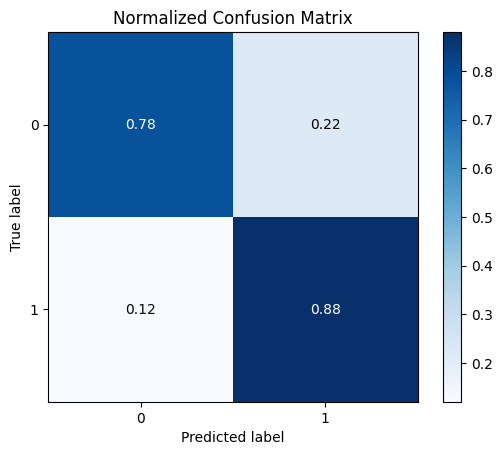

In [59]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
print("The accuracy is {}%".format(accuracy_score(test_y, y_pred) * 100))
confusionmatrix = confusion_matrix(test_y, y_pred)
print(confusionmatrix)
skplt.metrics.plot_confusion_matrix(test_y, y_pred, normalize = True)
plt.show()